In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import hvplot.pandas

In [2]:
# Load the crypto_market_data.csv into a DataFrame and set the index to the “coin_id” column
crypto_data = pd.read_csv('crypto_market_data.csv')
crypto_data.set_index('coin_id', inplace=True)

# Get the summary statistics to see what the data looks like before proceeding
print(crypto_data.describe())



       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

### Prepare the Data

In [3]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_data)

In [4]:
# Create a DataFrame with the scaled data and set the "coin_id" index from the original DataFrame as the index for the new DataFrame
scaled_df = pd.DataFrame(scaled_data, index=crypto_data.index, columns=crypto_data.columns)
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [5]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

    k_values  inertia_values
0          1      287.000000
1          2      212.123342
2          3      170.193571
3          4       79.022435
4          5       71.097914
5          6       66.108827
6          7       54.488123
7          8       43.224693
8          9       32.860884
9         10       28.404885
10        11       24.116198


c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

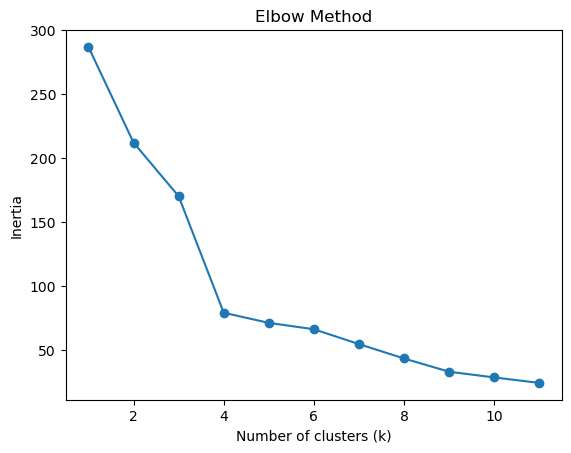

In [6]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the elbow method, the best value for k is where the inertia starts to decrease at a slower rate, which appears to be k=3 in this case.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [7]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)

In [8]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [9]:
# Create a copy of the DataFrame
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_data_clustered = crypto_data.copy()
crypto_data_clustered['cluster'] = kmeans.predict(scaled_df)

# View the resulting array of cluster values
print(crypto_data_clustered['cluster'])


coin_id
bitcoin                 0
ethereum                0
tether                  2
ripple                  2
bitcoin-cash            0
binancecoin             0
chainlink               0
cardano                 0
litecoin                0
bitcoin-cash-sv         2
crypto-com-chain        2
usd-coin                2
eos                     2
monero                  0
tron                    2
tezos                   0
okb                     2
stellar                 2
cosmos                  0
cdai                    2
neo                     2
wrapped-bitcoin         0
leo-token               2
huobi-token             2
nem                     2
binance-usd             2
iota                    2
vechain                 2
zcash                   0
theta-token             2
dash                    2
ethereum-classic        2
ethlend                 0
maker                   0
havven                  2
omisego                 2
celsius-degree-token    1
ontology                2
ftx-

In [10]:
# Add a new column to the DataFrame with the predicted clusters
crypto_data_clustered['predicted_cluster'] = kmeans.predict(scaled_df)

# Display sample data
print(crypto_data_clustered.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

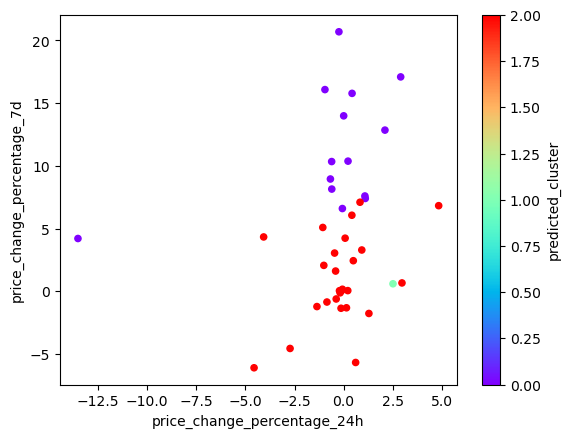

In [11]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_data_clustered.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='predicted_cluster', colormap='rainbow')
plt.show()  # Display the scatter plot

### Optimize Clusters with Principal Component Analysis.

In [12]:
# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)

In [13]:
# Use the PCA model with fit_transform on the original scaled DataFrame to reduce to three principal components
pca_transformed = pca.fit_transform(scaled_df)

# Create a new DataFrame with the transformed data
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'], index=crypto_data.index)

# View the first five rows of the DataFrame
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [14]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


In [15]:
# Calculate the total explained variance
total_explained_variance = sum(explained_variance)
print(total_explained_variance)

0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components can be obtained by summing the explained variance ratios of each individual principal component. The amount is 0.895031657030984.

In [16]:
# Creating a DataFrame with the PCA data
pca_data = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'], index=crypto_data.index)

# Copy the crypto names from the original data
pca_data['coin_name'] = crypto_data.index  # Assuming the coin names are the index of crypto_data

# Set the coinid column as index
pca_data.index.name = 'coinid'

# Display sample data
print(pca_data.head())


                   PC1       PC2       PC3     coin_name
coinid                                                  
bitcoin      -0.600667  0.842760  0.461595       bitcoin
ethereum     -0.458261  0.458466  0.952877      ethereum
tether       -0.433070 -0.168126 -0.641752        tether
ripple       -0.471835 -0.222660 -0.479053        ripple
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash


### Find the Best Value for k Using the PCA Data

In [17]:
# Remove non-numeric column 'coin_name' before fitting the KMeans model
pca_data_numeric = pca_data.drop(columns=['coin_name'])

# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using the PCA DataFrame without non-numeric columns
    kmeans_model.fit(pca_data_numeric)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



   k_values  inertia_values
0         1      256.874086
1         2      182.339530
2         3      140.431833
3         4       49.665497
4         5       42.051901
5         6       31.749005
6         7       28.031869
7         8       19.451747
8         9       13.814082
9        10       10.630648


c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

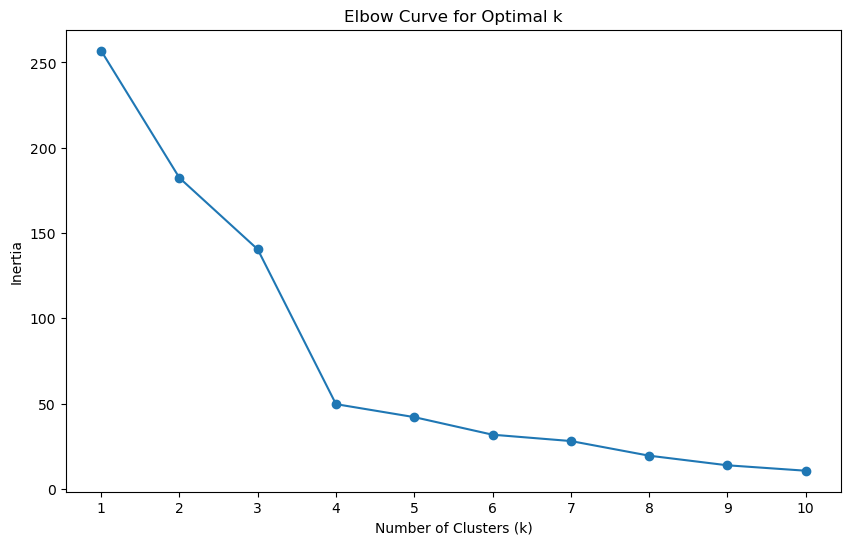

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k_values'])
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data can be visually identified from the elbow curve. It is the value of k where the inertia begins to decrease at a slower rate, often resembling an "elbow" in the plot.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best k value obtained from PCA data differ from the best k value found using the original data due to the dimensionality reduction effect of PCA.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [19]:
# Verify the column names in the 'pca_data' DataFrame
print(pca_data.columns)

Index(['PC1', 'PC2', 'PC3', 'coin_name'], dtype='object')


In [20]:
# Encode categorical data
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(pca_data['coin_name'])

# Drop the 'coin_name' column from pca_data
numeric_data = pca_data.drop(columns=['coin_name'])

# Scale numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Combine encoded categorical data and scaled numeric data
combined_data = pd.concat([pd.DataFrame(encoded_labels, columns=['encoded_name']), pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)], axis=1)

# Perform PCA
pca = PCA(n_components=2)  #reduce to 2 components
pca_result = pca.fit_transform(combined_data)

# Initialize the K-Means model using the specified value for k
k_values = 4
kmeans_model = KMeans(n_clusters=k_values, random_state=42)

# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_result)


c:\Users\19727\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [21]:
# Predict the clusters
clusters = kmeans_model.predict(pca_result)

# Print the resulting array of cluster values
print(clusters)


[1 2 0 0 1 1 1 1 3 1 2 0 2 3 0 0 3 0 1 1 3 0 3 3 3 1 3 0 0 0 2 2 2 3 2 3 1
 0 2 0 2]


In [22]:
# Create a copy of the DataFrame with the PCA data
pca_data_copy = pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_copy['predicted_cluster'] = clusters

# Display sample data
print(pca_data_copy.head())



                   PC1       PC2       PC3     coin_name  predicted_cluster
coinid                                                                     
bitcoin      -0.600667  0.842760  0.461595       bitcoin                  1
ethereum     -0.458261  0.458466  0.952877      ethereum                  2
tether       -0.433070 -0.168126 -0.641752        tether                  0
ripple       -0.471835 -0.222660 -0.479053        ripple                  0
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash                  1


In [23]:
# Create a scatter plot
scatter_plot = pca_data.hvplot.scatter(x='PC1', y='PC2')

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [24]:
# Use the columns from the original scaled DataFrame as the index.
pca_data.index = numeric_data.index

In [25]:
# Assuming 'numeric_data' is your scaled data
pca_model = PCA(n_components=2)  # Creating a PCA model with 2 components
pca_model.fit(numeric_data)  # Fitting the PCA model to the scaled data

# Get the weights of each feature on each principal component
feature_weights = pd.DataFrame(pca_model.components_, columns=numeric_data.columns, index=[f'PC{i+1}' for i in range(pca_model.n_components_)])

# Display the feature weights
print(feature_weights)

     PC1  PC2           PC3
PC1  1.0  0.0  0.000000e+00
PC2 -0.0  1.0 -1.249001e-16


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Each principal component seems to be influenced mainly by a single feature:
PC1 is primarily influenced by the first feature with a weight of 1.0.
PC2 is primarily influenced by the second feature with a weight of 1.0.
    